In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
pd.set_option('display.max_rows', 102)

In [2]:
df=pd.read_csv("/content/drive/MyDrive/College/DSBDBA/StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [6]:
columns_list=df.columns
print(columns_list)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [7]:
for i in columns_list:
    print(i)
    print(df[i].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
[ 74  88  93  44  75  78  92  39  67  50  52  43  73  70  58  86  28  46
  61  63  53  80  72  55  65  38  82  79  83  59  57  54  68  66  62  76
  

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['race/ethnicity'] = le.fit_transform(df['race/ethnicity'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])
df['lunch'] = le.fit_transform(df['lunch'])
df['parental level of education'] = le.fit_transform(df['parental level of education'])

In [9]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77


In [10]:
df.describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,0.482000,2.174000,2.486000,0.645000,0.642000,66.08900,69.169000,68.054000
std,0.499926,1.157179,1.829522,0.478753,0.479652,15.16308,14.600192,15.195657
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,57.00000,59.000000,57.750000
50%,0.000000,2.000000,2.000000,1.000000,1.000000,66.00000,70.000000,69.000000
75%,1.000000,3.000000,4.000000,1.000000,1.000000,77.00000,79.000000,79.000000
max,1.000000,4.000000,5.000000,1.000000,1.000000,100.00000,100.000000,100.000000


For detecting Outliers

In [11]:
df["math score"].mean()

66.089

In [12]:
df["math score"].std()

15.16308009600945

In [13]:
# lower_limit = df.mean() - 3*df.std()
# upper_limit = df.mean() + 3*df.std()
# print(upper_limit)
# print(lower_limit)
lower_limit = df.mean() - 1.5*(df.quantile(0.75)-df.quantile(0.25))
upper_limit = df.mean() + 1.5*(df.quantile(0.75)-df.quantile(0.25))
print(upper_limit)
print(lower_limit)

gender                          1.982
race/ethnicity                  5.174
parental level of education     6.986
lunch                           2.145
test preparation course         2.142
math score                     96.089
reading score                  99.169
writing score                  99.929
dtype: float64
gender                         -1.018
race/ethnicity                 -0.826
parental level of education    -2.014
lunch                          -0.855
test preparation course        -0.858
math score                     36.089
reading score                  39.169
writing score                  36.179
dtype: float64


<Axes: >

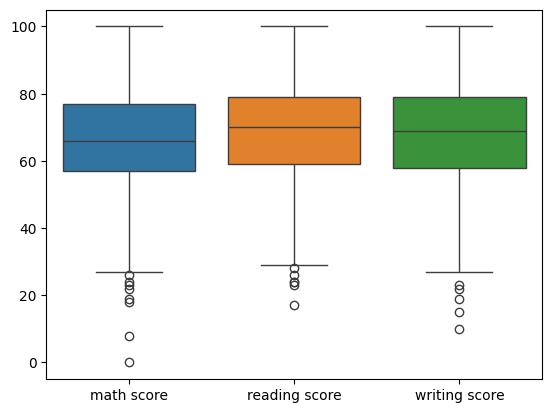

In [14]:
sbn.boxplot(df[["math score","reading score","writing score"]])

In [15]:
df = df[(df['math score'] > lower_limit['math score']) & (df['math score'] < upper_limit['math score'])]
df = df[(df['reading score'] > lower_limit['reading score']) & (df['reading score'] < upper_limit['reading score'])]
df = df[(df['writing score'] > lower_limit['writing score']) & (df['writing score'] < upper_limit['writing score'])]

In [16]:
df.describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000
mean,0.489247,2.163441,2.469892,0.654839,0.644086,66.458065,69.530108,68.459140
std,0.500153,1.150259,1.834268,0.475677,0.479047,12.863901,12.574585,13.145577
min,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,41.000000,38.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,58.000000,60.000000,59.000000
50%,0.000000,2.000000,2.000000,1.000000,1.000000,66.000000,70.000000,69.000000
75%,1.000000,3.000000,4.000000,1.000000,1.000000,76.000000,79.000000,78.000000
max,1.000000,4.000000,5.000000,1.000000,1.000000,96.000000,99.000000,99.000000


<Axes: >

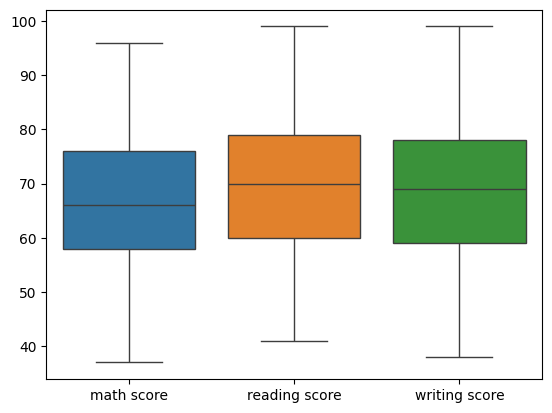

In [17]:
sbn.boxplot(df[["math score","reading score","writing score"]])